In [13]:
import pandas as pd
import numpy as np

In [29]:
data = pd.read_csv('iris-data.csv')
data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
data.describe()
# Quick googling learns us that per flower sepal length should be bigger than petal. At first glance this looks to be the 
# case in our dataset.

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
data.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [5]:
data['class'].unique()
# We can see that there are some inconsistensies here already. Setosa = Setossa, Iris versicolo = versicolor.

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [17]:
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [6]:
5/len(data['petal_width_cm'])
# Ratio of missing values to whole column.
# The null values make up about 3% of the dataset. It's reasonable to drop these rows.
# First we will locate them and maybe it makes more sense replacing the values with a mean.

0.03333333333333333

In [30]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN
# Looking at the NaN values we see that we can drop them.
data = data.dropna()
data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F4708DD90>,
      dtype=object)

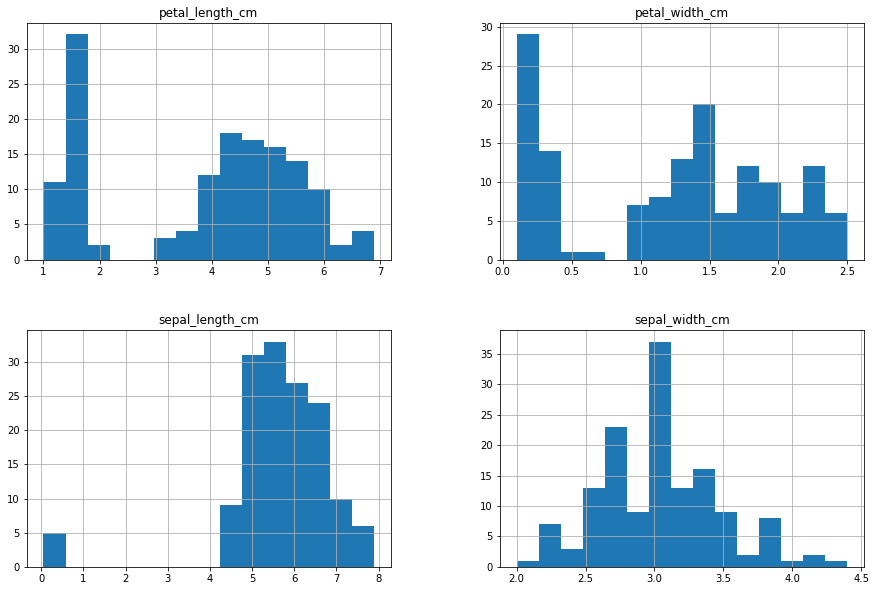

In [20]:
data.hist(bins=15, figsize=(15,10))

In [31]:
#Time to check for outliers

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers= data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
15,5.700,4.4,1.5,0.4,Iris-setosa
32,5.200,4.1,1.5,0.1,Iris-setosa
33,5.500,4.2,1.4,0.2,Iris-setosa
60,5.000,2.0,3.5,1.0,Iris-versicolor
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [32]:
# We got 9 outliers who represesent 9/145*100% = 6% of records.
# We will also drop these outliers. So in total we dropped (5+9) = 14 rows. Just shy of 10% of the total original DF.

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
# Time to fix the 'class' column so all classes are correctly represented.
data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [24]:
import re
def classnamefix(s):
    s = re.sub('Iris-setossa','Iris-setosa', s)
    s = re.sub('^versicolor$','Iris-versicolor', s)
    return s

In [33]:
data['class'] = data['class'].apply(lambda row: classnamefix(row))
data['class'].unique()

<ipython-input-33-4db05f1e75ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = data['class'].apply(lambda row: classnamefix(row))


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)